In [1]:
import pandas as pd
import numpy as np

In [2]:
origin_data = pd.read_csv('rating_matrix.csv')

In [4]:
origin_data.head()

,userID,placeID,rating,food_rating,service_rating
0,77,5085,2,2,2
1,77,5038,2,2,1
2,77,2825,2,2,2
3,77,5060,1,2,2
4,68,5104,1,1,2


In [5]:
criteria_rating = origin_data.drop('food_rating',1)
criteria_rating = criteria_rating.drop('service_rating',1)

In [6]:
criteria_rating.head()

,userID,placeID,rating
0,77,5085,2
1,77,5038,2
2,77,2825,2
3,77,5060,1
4,68,5104,1


In [7]:
criteria_food = origin_data.drop('rating',1)

criteria_food = criteria_food.drop('service_rating',1)

In [8]:
criteria_service = origin_data.drop('rating',1)

criteria_service = criteria_service.drop('food_rating',1)

In [9]:
n_users_rating = criteria_rating.userID.unique().shape[0]
n_items_rating = criteria_rating.userID.unique().shape[0]

In [10]:
print('\nNumber of users = ' + str(n_users_rating) + ' | Number of places ='+ str(n_items_rating))


Number of users = 138 | Number of places =138


In [11]:
rating_matrix = np.zeros((n_users_rating, n_items_rating))

In [12]:
rating_index = criteria_rating.set_index('placeID')

In [13]:
rating_index = pd.pivot_table(rating_index,index='userID', columns='placeID',values='rating')
rating_index.fillna(0, inplace=True)

In [14]:
rating_index.head()

placeID,2560,2561,2564,2572,2583,2584,2594,2608,2609,2613,...,5080,5081,5082,5085,5086,5088,5104,5106,5108,5109
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
rating_numpy = np.array(rating_index).astype(np.float32)

In [17]:
rating_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

여기까지는 rating에 대한 sparse matirx 만드는 과정 
최종적으로 rating에 대한 sparse matrix의 이름은 rating_numpy
전체 matrix이기도 함
나중에 각 criteria에 대한 matrix를 모두 더할 예정

In [18]:
n_users_service = criteria_service.userID.unique().shape[0]
n_items_service = criteria_service.userID.unique().shape[0]
print('\nNumber of users = ' + str(n_users_rating) + ' | Number of movies ='+ str(n_items_rating))
service_matrix = np.zeros((n_users_service, n_items_service))


Number of users = 138 | Number of movies =138


In [19]:
service_index = criteria_service.set_index('placeID')

In [20]:
service_index = pd.pivot_table(service_index,index='userID', columns='placeID',values='service_rating')
service_index.fillna(0, inplace=True)

In [21]:
service_index.head()

placeID,2560,2561,2564,2572,2583,2584,2594,2608,2609,2613,...,5080,5081,5082,5085,5086,5088,5104,5106,5108,5109
userID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
service_numpy = np.array(service_index).astype(np.float32)

In [23]:
service_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

이제 service까지 완료 되었고 food로 갑시다

In [24]:
n_users_food = criteria_food.userID.unique().shape[0]
n_items_food = criteria_food.userID.unique().shape[0]
print('\nNumber of users = ' + str(n_users_food) + ' | Number of movies ='+ str(n_items_food))
food_matrix = np.zeros((n_users_food, n_items_food))


Number of users = 138 | Number of movies =138


In [25]:
food_index = criteria_food.set_index('placeID')

In [26]:
food_index = pd.pivot_table(food_index,index='userID', columns='placeID',values='food_rating')
food_index.fillna(0, inplace=True)

In [27]:
food_numpy = np.array(food_index).astype(np.float32)

In [28]:
food_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

    여기까지 각 criteria에 대한 sparse matrix가 작성되었고 
    이제 모두 더하고 알고리즘을 적용시켜 봅시다.

In [29]:
sum_matrix = food_numpy + rating_numpy + service_numpy

In [30]:
sum_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

    모두 더했고 이제 아래는 알고리즘을 사용하기 위한 준비 및 적용 그리고 평가를 해보자!

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
##이것은 RMSE


def rmse(prediction, actual):
    prediction = prediction[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual))

In [33]:
## 이것은 MAE


from sklearn.metrics import mean_absolute_error

In [34]:
from sklearn import metrics

# SVD

In [35]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [36]:
sparsity_rating = round(1.0-len(criteria_rating)/float(n_users_rating*n_items_rating),1)
print('The sparsity level of is' + str(sparsity_rating*100)+'%')

sparsity_service = round(1.0-len(criteria_service)/float(n_users_service*n_items_service),1)
print('The sparsity level of is' + str(sparsity_service*100)+'%')

sparsity_food = round(1.0-len(criteria_food)/float(n_users_food*n_items_food),1)
print('The sparsity level of is' + str(sparsity_food*100)+'%')


The sparsity level of is90.0%
The sparsity level of is90.0%
The sparsity level of is90.0%


In [37]:
u, s, vt = svds(sum_matrix, k = 5)

In [38]:
s_diag_matrix=np.diag(s)

In [39]:
pd.DataFrame(s_diag_matrix)

,0,1,2,3,4
0,26.062262,0.000000,0.000000,0.000000,0.000000
1,0.000000,26.673174,0.000000,0.000000,0.000000
2,0.000000,0.000000,28.654623,0.000000,0.000000
3,0.000000,0.000000,0.000000,35.316017,0.000000
4,0.000000,0.000000,0.000000,0.000000,54.470371


## svd 결과

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

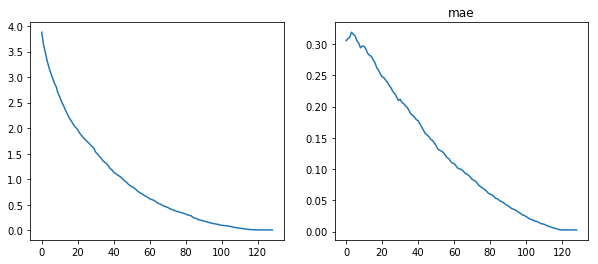

In [41]:
plot_rmse =[]
plot_mae =[]
for x in range(1,130):
    u, s, vt = svds(sum_matrix, k = x)
    s_diag_matrix=np.diag(s)
    X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
#     print('User-based CF MSE: ' + str(rmse(X_pred, sum_matrix)))
#     print('User-based CF MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))
   
    plt_rmse = [rmse(X_pred, sum_matrix)]
    plt_mae = mean_absolute_error(X_pred, sum_matrix)
    plot_rmse.append(plt_rmse)
    plot_mae.append(plt_mae)
    
plt.figure(figsize=(10,4)) 
num_K = np.array([range(1,130)])
plt.subplot(1,2,1)
# plt.plot(num_K,plt_rmse,'o',color='#0066FF')
plt.plot(plot_rmse)
plt.subplot(1,2,2)
plt.title("rmse")
plt.plot(plot_mae)
plt.title("mae")
# plt.plot(num_K, plt_mae,'o',color='#0066FF')
plt.show()

In [42]:
u, s, vt = svds(sum_matrix, k = 100)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('MSE: ' + str(rmse(X_pred, sum_matrix)))
print('MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))

MSE: 0.1020356080306025
MAE: 0.025871597


In [43]:
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

print('MSE: ' + str(rmse(X_pred, sum_matrix)))

print('MAE: ' + str(mean_absolute_error(X_pred, sum_matrix)))

MSE: 0.1020356080306025
MAE: 0.025871597


# nmf

In [44]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

In [45]:
from sklearn.decomposition import NMF , ProjectedGradientNMF
R = sum_matrix
R = np.array(R)
nmf = NMF()
W = nmf.fit_transform(R);
H = nmf.components_;
nR = np.dot(W,H)
print (nR)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.31026468e-06
  2.33411123e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.99999944e+00
  6.22186863e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.16816930e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.12045959e-06
  1.56177864e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [50]:
print('RMSE: ' + str(rmse(nR, sum_matrix)))
print('MAE: ' + str(mean_absolute_error(nR, sum_matrix)))

RMSE: 0.2132568500482011
MAE: 0.011949516500312255
